In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
df = pd.read_csv(r"C:\Users\omara\OneDrive\Desktop\Omar\Portfolio\Python\Sentiment Analysis\Reviews.csv\Reviews.csv")
df=df.head(500)

In [5]:
df.shape

(500, 10)

<Axes: title={'center': 'Count of Reviews By Stars'}, xlabel='Score'>

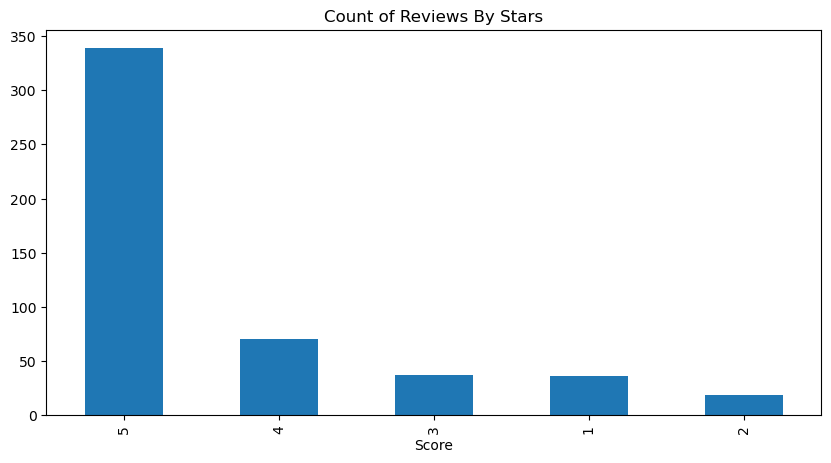

In [6]:
df['Score'].value_counts().plot(kind = 'bar',title = 'Count of Reviews By Stars', figsize=(10,5))

In [7]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## Use Vader Sentiment Scoring

Will use NLTK SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text

1) It removes the stop words(the,and,exc..)
2) each word is scored and combined to a total score

In [8]:
from nltk.sentiment import  SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\omara\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Create an instance
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of a sentence
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [10]:
res = {}

# Loop through the DataFrame and analyze the sentiment of each text entry by Id
for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    polarity_scores = sia.polarity_scores(text)
    res[myid] = polarity_scores

# Print the resulting dictionary
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [11]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [12]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot Vader Results

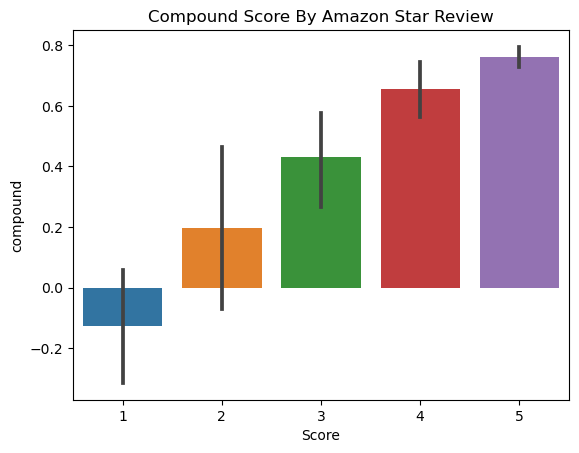

In [13]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score By Amazon Star Review')
plt.show()         

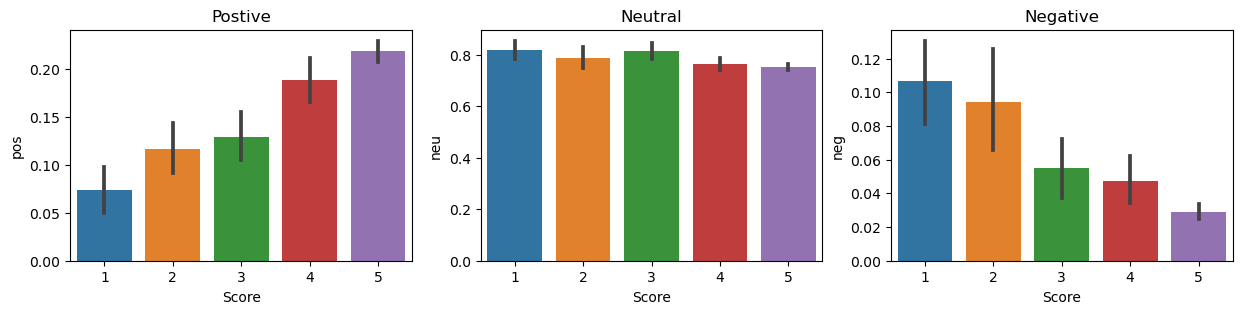

In [14]:
fig, axs = plt.subplots( 1, 3, figsize=(15,3))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()